In [1]:
!pip install numpy matplotlib playsound

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=3ebbb1bdccc5fdd9460dc6c600a260617cb5e1dfa2433b48d119f68c41892c78
  Stored in directory: /home/laura/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
from scipy.io.wavfile import write
import playsound
import time



plt.rcParams["figure.dpi"] = 100

# 0 Useful objects and functions
We suggest implementing the following functions that you can use throughout the lab.

In [3]:
def cexp(k: int, N: int):
    """
    A function that creates complex exponential with frequency k and length N.

    Args:
        k: discrete frequency
        N: length

    Returns:
        a numpy array of length N.
    """
    #############################
    # YOUR CODE HERE
    arr = np.cos(2 * np.pi * k * np.arange(N) / N) + 1j * np.sin(2 * np.pi * k * np.arange(N) / N)
    return arr / np.sqrt(N)
    #############################

def inner_product(x, y):
    """
    Computes the inner product between two numpy arrays x and y.

    Args:
        x: numpy array.
        y: numpy array.
    """
    #############################
    # YOUR CODE HERE
    return np.inner(x, y)
    # do you want us to implement it from scratch?
    # assume x and y are 1 dimensional and of the same length.
    # assert len(x.shape) == len(y.shape) == 1
    # assert x.shape == y.shape
    # return np.sum(x * np.conj(y))
    #############################


# 1 Signal Generation


## 1.1 Generating Complex Exponentials

In [4]:
def q_11(N, k_list):
    """
    Plot complex exponentials of length N for each frequency k in k_list.
    Args:
        k_list: List of discrete frequencies
        N: length
    """

    for k in k_list:
        # TO DO: Create a complex exponential signal of length N and frequency k
        #############################
        # YOUR CODE HERE
        cpx_exp = cexp(k, N)
        #############################

        # TO DO: Obtain the real and imaginary parts
        #############################
        # YOUR CODE HERE
        cpx_cos = np.real(cpx_exp)
        cpx_sin = np.imag(cpx_exp)
        #############################

        # Plots real and imaginary parts
        cpx_plt = plt.figure()
        ax = cpx_plt.add_subplot(111)
        plt.stem(np.arange(N), cpx_cos, 'tab:blue', markerfmt='bo', label='Real part')
        plt.stem(np.arange(N), cpx_sin, 'tab:red', markerfmt='ro', label='Imaginary part')
        plt.title('Complex exponential: k = ' + str(k) + ', N = ' + str(N), fontsize=10)
        plt.xlabel('n', fontsize=9)
        plt.ylabel('x[n]', fontsize=9)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.legend()

        # Aspect ratio credit: https://jdhao.github.io/2017/06/03/change-aspect-ratio-in-mpl/
        ratio = 1/(16/9)
        xleft, xright = ax.get_xlim()
        ybottom, ytop = ax.get_ylim()
        ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

        # Saves plot
        # fig_path_name = 'q11_cpxexp_k' + str(k) + '.png'
        # plt.savefig(fig_path_name, dpi=300)
        plt.show()

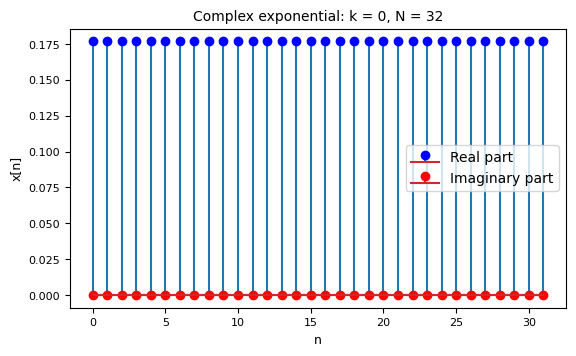

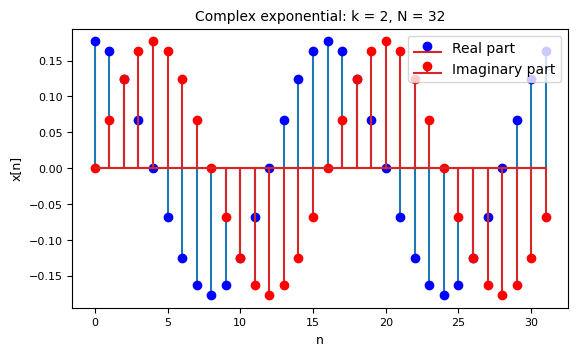

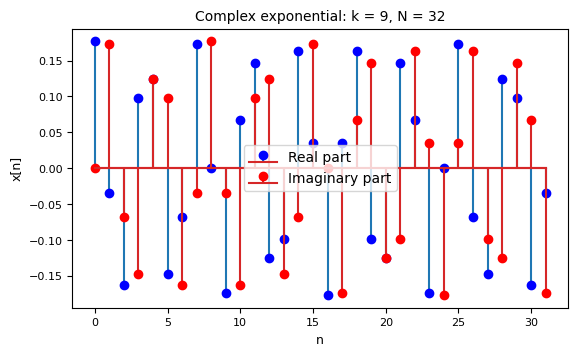

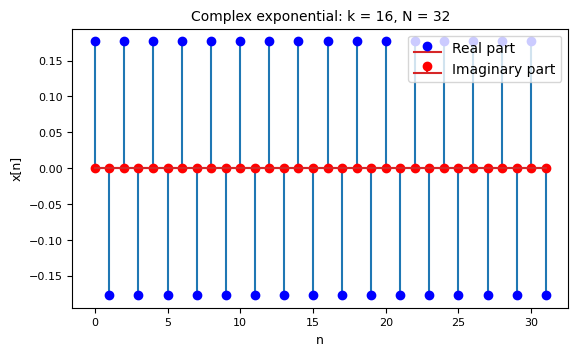

In [ ]:
# TO DO: Call q_11().
q_11(k_list=[0, 2, 9, 16], N=32)

## 1.2 Equivalent Complex Exponentials

Generate complex exponentials of the same duration and frequencies, $k$ and $l$, that are $N$ apart. E.g., make $N = 32$ and plot signals for frequencies $k=3$ and $l=3+32=35$ and $l=3−32=−29$. You should observe that these signals are identical.


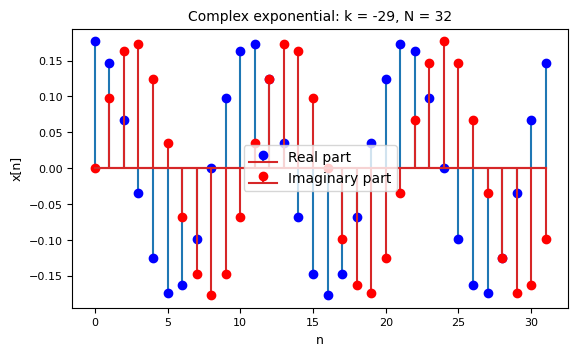

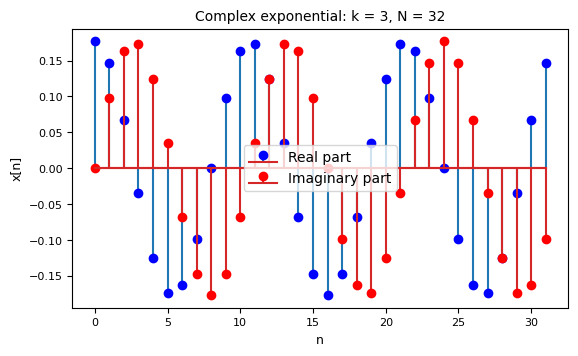

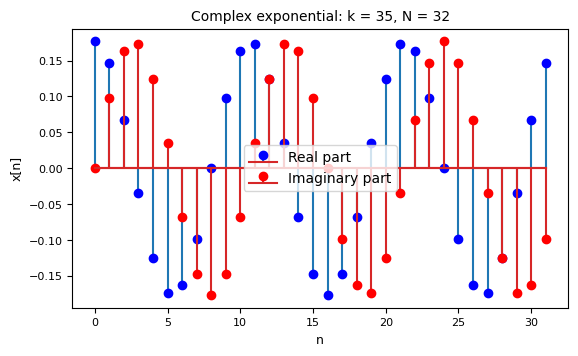

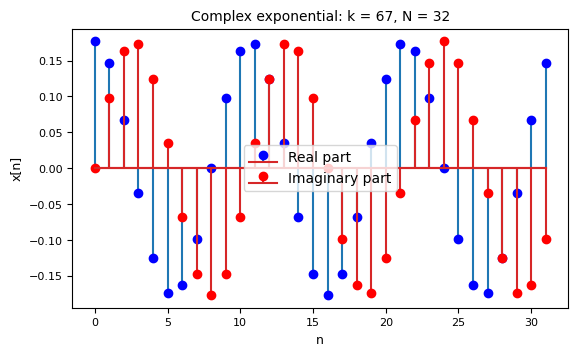

In [ ]:
# TO DO: Run q_12().

k=3
N=32
q_11(k_list=[k-N, k, k+N, k+2*N], N=N)

## 1.3 Conjugate complex exponentials

Generate complex exponentials of the same duration and opposite frequencies $k$ and $-k$. E.g., make $N=32$ and plot signals for frequencies $k=3$ and $k=−3$. You should observe that these signals have the same real part and opposite imaginary parts. We say that the signals are conjugates of each other.

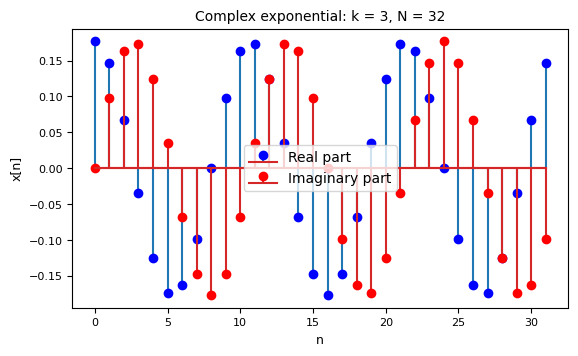

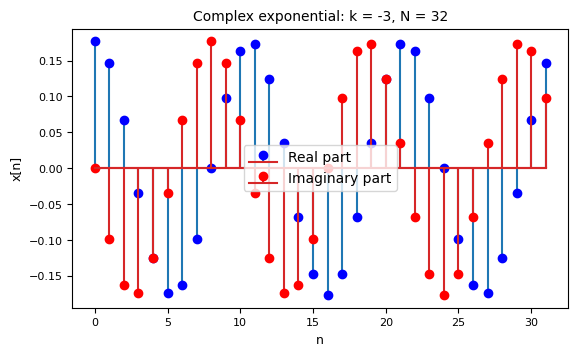

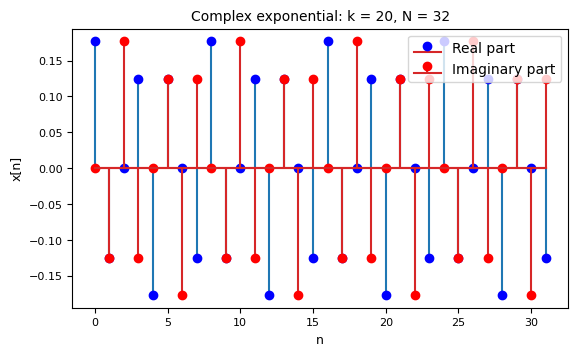

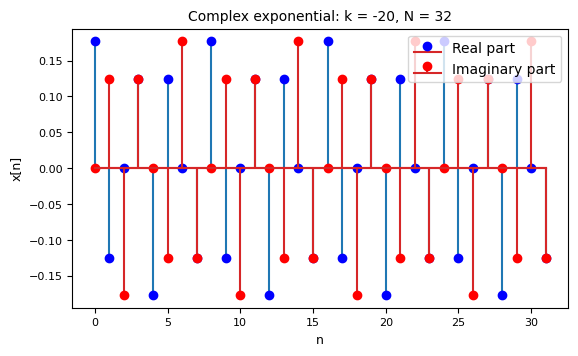

In [ ]:
# TO DO: Run q_13().
q_11(k_list=[3, -3, 20, -20], N=32)

## 1.4 More conjugate complex exponentials
Consider now frequencies $k$ and $l$ in the interval $[0, N−1]$ such that their sum is $k+l=N$. E.g., verify this for $k=3$ and $l = 32-3=29$.

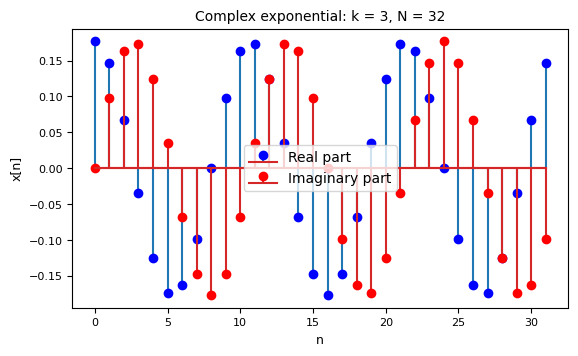

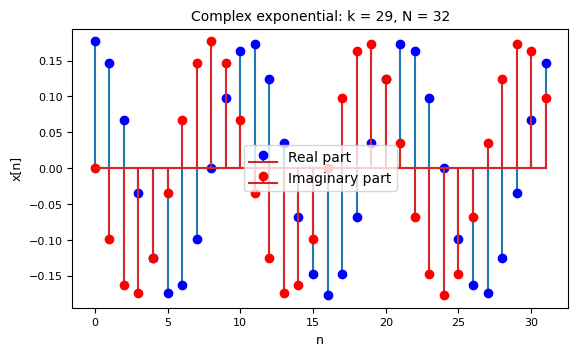

In [ ]:
# TO DO: Run q_14().
q_11(k_list=[3, 29], N=32)

## 1.5 Orthonormality
Write a function to compute the inner product $\langle e_{kN} , e_{lN} \rangle$ between all pairs of discrete complex exponentials of length $N$ and frequencies $k,l=0,1,...,N−1$. Run and report your result for $N=16$. You should observe that the complex exponentials have unit  energy and are orthogonal to each other. When this happens, we say that  the signals form an orthonormal set.

In [ ]:
def q_15(k_list, N):
    """
    Print and visualize the inner product between pairs of discrete complex exponentials.
    Args:
        k_list: List of discrete frequencies
        N: length
    """

    cpx_exps = np.zeros((N,N), dtype=complex)
    # TO DO: Build a matrix whose jth column stores the signal with k_list[j] freq.
    #############################
    # YOUR CODE HERE
    for i, k in enumerate(k_list):
        cpx_exp = cexp(k, N)
        cpx_exps[i] = cpx_exp
    #############################

    cpx_exps_conj = np.conjugate(cpx_exps)
    res = np.zeros((N,N), dtype=complex) # store inner products in this matrix
    # TO DO: Loop over the pairs and store the inner products in a matrix called res
    #############################
    # YOUR CODE HERE
    for i, k in enumerate(cpx_exps):
      for j, k_ in enumerate(cpx_exps):
        inner = inner_product(k, k_)
        res[i,j] = inner
    #############################

    res = res.real
    print (f"Matrix of inner products: \n{res}")

    # Let us also visualize the inner products
    fig, ax = plt.subplots()
    im = ax.imshow(res, cmap = 'Blues')
    plt.title('Inner products: N = ' + str(N), fontsize=10)
    plt.xlabel('l = [0, N - 1]', fontsize=9)
    plt.ylabel('k = [0, N - 1]', fontsize=9)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    fig.colorbar(im, ax=ax)
    # Saves plot
    # fig_path_name = 'q15_colormap.png'
    # plt.savefig(fig_path_name, dpi=300)
    plt.show()

    return res

Matrix of inner products: 
[[ 1.00000000e+00 -5.62262998e-17  2.77555756e-17 -7.76518341e-17
  -3.63683077e-16 -1.52761962e-16 -2.49800181e-16  1.85417282e-16
   0.00000000e+00  5.02556587e-19 -2.77555756e-17  2.05625111e-16
  -5.74285305e-16 -2.83383241e-16  5.68989300e-16  1.77320628e-15]
 [-5.62262998e-17  0.00000000e+00 -1.00717284e-16  2.77555756e-17
  -1.48029581e-16  2.08166817e-17  2.84026372e-18  0.00000000e+00
   1.10315300e-16  1.38777878e-16  3.36959864e-16  4.09394740e-16
   3.19967406e-16 -8.95117314e-16  5.23050860e-16  1.00000000e+00]
 [ 2.77555756e-17 -1.00717284e-16 -3.88578059e-16 -1.02320764e-16
   7.97007779e-17  6.68660421e-17  0.00000000e+00 -1.78549030e-16
  -1.59401556e-16  7.55627278e-16  2.22044605e-16  5.47841564e-16
  -2.08469504e-16 -7.62209136e-16  1.00000000e+00 -1.86637663e-15]
 [-7.76518341e-17  2.77555756e-17 -1.02320764e-16 -2.22044605e-16
  -3.60225440e-17  2.77555756e-17 -4.09251679e-17  1.80411242e-16
   3.00243757e-16 -1.94289029e-16 -1.57472034e

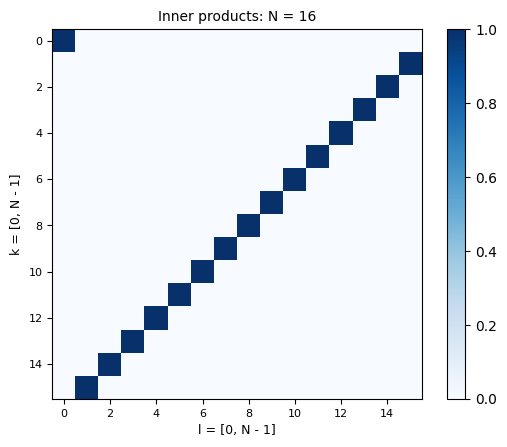

array([[ 1.00000000e+00, -5.62262998e-17,  2.77555756e-17,
        -7.76518341e-17, -3.63683077e-16, -1.52761962e-16,
        -2.49800181e-16,  1.85417282e-16,  0.00000000e+00,
         5.02556587e-19, -2.77555756e-17,  2.05625111e-16,
        -5.74285305e-16, -2.83383241e-16,  5.68989300e-16,
         1.77320628e-15],
       [-5.62262998e-17,  0.00000000e+00, -1.00717284e-16,
         2.77555756e-17, -1.48029581e-16,  2.08166817e-17,
         2.84026372e-18,  0.00000000e+00,  1.10315300e-16,
         1.38777878e-16,  3.36959864e-16,  4.09394740e-16,
         3.19967406e-16, -8.95117314e-16,  5.23050860e-16,
         1.00000000e+00],
       [ 2.77555756e-17, -1.00717284e-16, -3.88578059e-16,
        -1.02320764e-16,  7.97007779e-17,  6.68660421e-17,
         0.00000000e+00, -1.78549030e-16, -1.59401556e-16,
         7.55627278e-16,  2.22044605e-16,  5.47841564e-16,
        -2.08469504e-16, -7.62209136e-16,  1.00000000e+00,
        -1.86637663e-15],
       [-7.76518341e-17,  2.77555756e

In [ ]:
# TO DO: Run q_15().
q_15(N=16, k_list=np.arange(16))

# 2 Analysis

# 3 Generating and Playing Musical Tones

## 3.1 & 3.2 Discrete Cosine Generation & Generating an A Note
Write down a function that takes as input the sampling frequency $f_s$, the time duration $T$, and the frequency $f_0$ and returns the associated discrete cosine $x(n)$. Your function has to also return the number of samples $N$. When $T$ is not a multiple of $T_s=1/f_s$ you can reduce $T$ to the largest multiple of $T_s$ smaller than $T$.

The musical A note corresponds to an oscillation at frequency $f_0 = 440$ Hertz.Use the code you have just written to generate an A note of duration $T=2$ seconds sample data frequency $f_s=44,100$ Hertz. Play the note in your computer’s speakers.

In [27]:
def cexpt(f, T, fs):
    """
    This function generates a (sampled) continuous-time complex exponential.
    Arguments:
        f: frequency of the complex exponential
        T: duration of the signal. T = N*T_s
        fs: sampling frequency. f_s = 1/T_s where T_s is the duration between two adjacent samples.
    Returns
        x: vector of samples of a complex exponential of frequency f and duration T
        N: number of samples
    """
    assert T > 0, "Duration of the signal cannot be negative."
    assert fs != 0, "Sampling frequency cannot be zero"

    if fs < 0:
        warnings.warn("Sampling frequency is negative. Using absolute value instead.")
        fs = - fs

    if f < 0:
        warnings.warn("Complex exponential frequency is negative. Using absolute value instead.")
        f = -f

    # TO DO: Convert the frequency f to a discrete frequency and generate a
    # discrete complex exponential.
    #############################
    # YOUR CODE HERE
    Ts = 1/fs
    N = np.floor(T/Ts)
    # Convert continuous frequency to discrete frequency
    k = int(f * N / fs)
    x = cexp(k, N)
    #############################

    return x, N


def q_32(f0, T, fs):
    # Retrieves complex exponential
    cpxexp, num_samples = cexpt(f0, T, fs)
    # Cosine is the real part
    Anote = cpxexp.real
    # Playing the note
    write("Anote.wav", fs, Anote.astype(np.float32))
    playsound.playsound("Anote.wav")



In [46]:
def play_piano_key(i, t, bpm=70):
    """i: piano key number
    t: how long to play it for. given in number of beats.
    """
    f = int(2 ** ((i-49)/12) * 440)
    fs = f*100
    T = 60/bpm * t # number of seconds to play it for
    q_32(f, T, fs)


# TO DO: Call q_32().
q_32(f0=440, T=2, fs=44100)
# A4 is key 49. test:
play_piano_key(49, 2, 60)


## 3.3 & 3.4 Generate Musical Notes


In [49]:
# We're going to play can't catch me now by olivia rodrigo, which is in 70bpm and B minor.
# Music notes are referenced from here: https://www.lauragao.ca/cant-catch-me-now.pdf (an arrangement I did for my acapella group)
# Note that some of the notes are kinda low and sound bad on python. set the following variable to True to hear
# the arrangment in a higher octave—it may sound better to the ear.

higher_octave = False

# piano key number of common notes:
common_notes = {
    "G2": 23,
    "A2": 25,
    "B2": 27,
    "C#3": 29,
    "D3": 30,
    "F#3": 34,
    "G3": 35,
    "A3": 37,
    "B3": 39,
    "C#4": 41,
    "D4": 42,
    "E4": 44,
    "F#4": 46,
    "A4": 49,
    "B4": 51,
    "C#5": 53,
    "D5": 54
}

def play_note(note: str, t: float):
    play_piano_key(common_notes[note]+ (12 if higher_octave else 0), t)

# the bassline is (for the most part) a bunch of repeated 16th notes
bassline_1 = ["B2", "F#3", "B2", "A3", "D3", "F#3", "D3", "A3", "G2", "F#3", "D3"]
for note in bassline_1:
    play_note(note, 1/4)
play_note("A3", 1/2)
play_note("D3", 1/4)
play_note("A3", 1/4)
for note in bassline_1:
    play_note(note, 1/4)
play_note("A3", 1/2)
play_note("D3", 1/4)

# FIRST VERSE
play_note("B3", 1/4) # there's
play_note("B3", 1/3) # blood
play_note("B3", 1/3) # on
play_note("B3", 1/3) # the
play_note("D4", 1/3) # side
play_note("C#4", 1/3) # of
play_note("B3", 1/3) # the
play_note("C#4", 1/2) # moun
play_note("B3", 1/3) # tain

time.sleep(.75 * 60/70) # dotted eighth-rest

play_note("B3", 1/4) # there's
play_note("B3", 1/3) # wri
play_note("B3", 1/3) # ting
play_note("B3", 1/3) # all
play_note("D4", 1/3) # ov
play_note("E4", 1/3) # er
play_note("D4", 1/3) # the
play_note("C#4", 1) # wall

time.sleep(1 * 60/70) # quarter rest

play_note("B3", 1/3) # sha
play_note("B3", 1/3) # dows
play_note("B3", 1/3) # of
play_note("D4", 1/3) # us
play_note("C#4", 1/3) # are
play_note("B3", 1/3) # still
play_note("C#4", 1/2) # dan
play_note("B3", 1) # cing

time.sleep(1/4 * 60/70) # sixteenth rest

play_note("B3", 1/4) # in
play_note("B3", 1/3) # ev
play_note("B3", 1/3) # ry
play_note("B3", 1/3) # room
play_note("D4", 1/4) # and
play_note("E4", 1/2) # ev
play_note("D4", 1/4) # ry
play_note("C#4", 1) # hall

time.sleep(.67 * 60/70) # 2/3 triplet rest

play_note("B3", 1/3) # yeah
play_note("B3", 1/3) # you
play_note("B3", 1/3) # think
play_note("B3", 1/3) # that
play_note("D4", 1/3) # you
play_note("E4", 1/3) # got
play_note("D4", 1/3) # aw
play_note("C#4", 1) # ay

time.sleep(.5 * 60/70) # half rest

# CHORUS
play_note("D4", 1/4)
play_note("C#4", 1/4)
play_note("B3", 1/2)
play_note("C#4", 1/4)
play_note("D4", 3/4)
play_note("E4", 1/4)
play_note("F#4", 3/4)
play_note("B4", 1/4)
play_note("B4", 3/4)
play_note("C#5", 1/2)
play_note("B4", 1/2)
play_note("C#5", 1/2)
play_note("B4", 1/2)
play_note("A4", 1/4)
play_note("F#4", 1)

time.sleep(.75 * 60/70)

play_note("B4", 1/4)
play_note("B4", 1/2)
play_note("C#5", 1/2)
play_note("B4", 3/4)
play_note("A4", 1/4)
play_note("F#4", 1/2)
play_note("E4", 1/2)
play_note("D4", 3/4)
play_note("E4", 1/4)
play_note("F#4", 1/4)
time.sleep(.25 * 60/70)
play_note("F#4", 3/4)
play_note("E4", 1/2)
play_note("D4", 1/4)
play_note("B3", 1/4)
play_note("A3", 1/2)
